In [52]:
import os
os.environ['PATH'] += os.pathsep + '/usr/lib/x86_64-linux-gnu/graphviz'

In [54]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
from sklearn.tree import export_graphviz
import graphviz
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV

# 1. 기술통계 분석

In [55]:
# boston 주택가격 영향 인자 데이터 가져오기
ds_boston = pd.read_csv('./BOSTON_HOUSING.csv', engine = 'python')
ds_boston.head()

# 요약 통계량
ds_boston.describe().round(3)

,MEDV,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000,506.000,506.000,506.000,506.000,506.000,506.000,506.000,506.000,506.000,506.000,506.000,506.000,506.000
mean,22.533,3.614,11.364,11.137,0.069,0.555,6.285,68.575,3.795,9.549,408.237,18.456,356.674,12.653
std,9.197,8.602,23.322,6.860,0.254,0.116,0.703,28.149,2.106,8.707,168.537,2.165,91.295,7.141
min,5.000,0.006,0.000,0.460,0.000,0.385,3.561,2.900,1.130,1.000,187.000,12.600,0.320,1.730
25%,17.025,0.082,0.000,5.190,0.000,0.449,5.886,45.025,2.100,4.000,279.000,17.400,375.377,6.950
50%,21.200,0.257,0.000,9.690,0.000,0.538,6.209,77.500,3.207,5.000,330.000,19.050,391.440,11.360
75%,25.000,3.677,12.500,18.100,0.000,0.624,6.623,94.075,5.188,24.000,666.000,20.200,396.225,16.955
max,50.000,88.976,100.000,27.740,1.000,0.871,8.780,100.000,12.127,24.000,711.000,22.000,396.900,37.970


In [56]:
# 주택가격별 범죄율 데이터 subset
df = ds_boston[['MEDV', 'CRIM']]

In [57]:
# 주택가격별 데이터 수 평균, 표준편차
df.groupby('MEDV').describe()

CRIM                                                         \
          count       mean        std        min        25%        50%   
MEDV                                                                     
5.000000    2.0  53.136299  20.908441  38.351799  45.744049  53.136299   
5.600000    1.0  25.046101        NaN  25.046101  25.046101  25.046101   
6.300000    1.0   9.916550        NaN   9.916550   9.916550   9.916550   
7.000000    2.0  22.964736  32.217716   0.183370  11.574053  22.964736   
7.200000    3.0  16.377534   1.960609  14.236200  15.524000  16.811800   
...         ...        ...        ...        ...        ...        ...   
46.700001   1.0   0.298190        NaN   0.298190   0.298190   0.298190   
48.299999   1.0   0.331470        NaN   0.331470   0.331470   0.331470   
48.500000   1.0   0.035100        NaN   0.035100   0.035100   0.035100   
48.799999   1.0   0.520140        NaN   0.520140   0.520140   0.520140   
50.000000  16.0   2.703412   3.145228   0.013810   0.409202   1.491190   

                                 
                 75%        max  
MEDV                             
5.000000   60.528549  67.920799  
5.600000   25.046101  25.046101  
6.300000    9.916550   9.916550  
7.000000   34.355419  45.746101  
7.200000   17.448200  18.084600  
...              ...        ...  
46.700001   0.298190   0.298190  
48.299999   0.331470   0.331470  
48.500000   0.035100   0.035100  
48.799999   0.520140   0.520140  
50.000000   5.091160   9.232300  

[229 rows x 8 columns]

# 2. 결측치 확인

In [58]:
# NaN 값이 있는 개수를 확인 가능하다.
ds_boston.isnull().sum()

MEDV       0
CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64

In [59]:
# 값이 결측이면 True, 값이 있으면 False 로 나타낸다.
ds_boston.isnull().head()

,MEDV,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False


결측치 없으므로 그대로 진행한다.

# 3. 이상치 처리

In [60]:
ds_boston.describe()

,MEDV,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,22.532806,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674030,12.653063
std,9.197104,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148862,2.105710,8.707259,168.537116,2.164946,91.294863,7.141062
min,5.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,17.025000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377487,6.950000
50%,21.200001,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440002,11.360000
75%,25.000000,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.074999,5.188425,24.000000,666.000000,20.200001,396.225006,16.954999
max,50.000000,88.976196,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.899994,37.970001


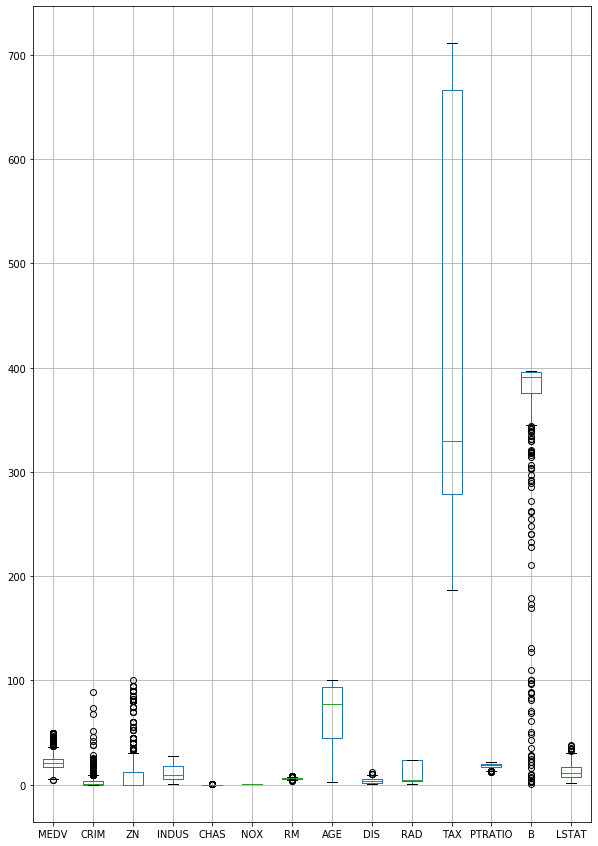

In [61]:
ds_boston.boxplot(figsize=(10,15))

boxplot 을 그렸을 때, 흑인 인구 비율 변수에 대한 이상치가 지나치게 많이 나와 이에 대한 이유를 검토하는 것이 필요하다고 판단했다.

# 4. 탐색적 분석으로 통찰(insight) 얻기

## (1) BoxPlot 을 통해 데이터의 분포와 관계 파악

### 1) 흑인 비율(B)에 따른 부동산 가격

In [62]:
ds_boston['Black'] = (ds_boston['B'] >= 200)
ds_boston[144:] # Black 이 많은 경우에 True, 아닌 경우 False

,MEDV,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Black
144,11.800000,2.77974,0.0,19.58,0,0.871,4.903,97.800003,1.3459,5,403,14.7,396.899994,29.290001,True
145,13.800000,2.37934,0.0,19.58,0,0.871,6.130,100.000000,1.4191,5,403,14.7,172.910004,27.799999,False
146,15.600000,2.15505,0.0,19.58,0,0.871,5.628,100.000000,1.5166,5,403,14.7,169.270004,16.650000,False
147,14.600000,2.36862,0.0,19.58,0,0.871,4.926,95.699997,1.4608,5,403,14.7,391.709992,29.530001,True
148,17.799999,2.33099,0.0,19.58,0,0.871,5.186,93.800003,1.5296,5,403,14.7,356.989990,28.320000,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,22.400000,0.06263,0.0,11.93,0,0.573,6.593,69.099998,2.4786,1,273,21.0,391.989990,9.670000,True
502,20.600000,0.04527,0.0,11.93,0,0.573,6.120,76.699997,2.2875,1,273,21.0,396.899994,9.080000,True
503,23.900000,0.06076,0.0,11.93,0,0.573,6.976,91.000000,2.1675,1,273,21.0,396.899994,5.640000,True
504,22.000000,0.10959,0.0,11.93,0,0.573,6.794,89.300003,2.3889,1,273,21.0,393.450012,6.480000,True


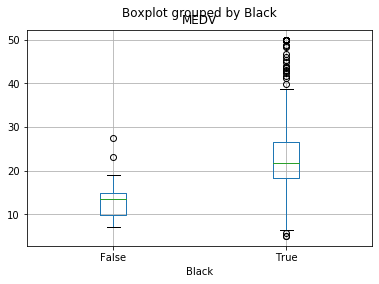

In [63]:
ds_boston.boxplot(column='MEDV', by='Black')

[인사이트] 흑인 비율이 350 이상인 지역에서는 부동산 가격이 높게 나타난다.
= 흑인 비율이 높으면 부동산 가격이 높게 나타난다.

In [64]:
ds_boston1 = ds_boston[ds_boston['B'] > 350]["MEDV"]
ds_boston2 = ds_boston[ds_boston['B'] <= 350]["MEDV"]

ds_boston1

0      24.000000
1      21.600000
2      34.700001
3      33.400002
4      36.200001
         ...    
501    22.400000
502    20.600000
503    23.900000
504    22.000000
505    11.900000
Name: MEDV, Length: 424, dtype: float64

In [65]:
ds_boston2

18     20.200001
25     13.900000
27     14.800000
32     13.200000
34     13.500000
         ...    
467    19.100000
475    13.300000
477    12.000000
489     7.000000
490     8.100000
Name: MEDV, Length: 82, dtype: float64

In [66]:
t_result = stats.ttest_ind(ds_boston1,ds_boston2)
t,p = t_result.statistic.round(3), t_result.pvalue.round(3)
print("2-Sample t-test")
print(t_result)
print("t:{}".format(t))
print("p:{}".format(p))

2-Sample t-test
Ttest_indResult(statistic=7.9892087739330355, pvalue=9.301366416809003e-15)
t:7.989
p:0.0


#### [결론] p-value 는 0.05보다 작으므로 흑인 비율은 보스턴 부동산 가격에 영향을 미치는 것으로 판단할 수 있다.

### 2) 범죄율(CRIM)과 부동산 가격

In [67]:
ds_boston['Crime'] = (ds_boston['CRIM'] >= 1.5)
ds_boston[144:]

,MEDV,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Black,Crime
144,11.800000,2.77974,0.0,19.58,0,0.871,4.903,97.800003,1.3459,5,403,14.7,396.899994,29.290001,True,True
145,13.800000,2.37934,0.0,19.58,0,0.871,6.130,100.000000,1.4191,5,403,14.7,172.910004,27.799999,False,True
146,15.600000,2.15505,0.0,19.58,0,0.871,5.628,100.000000,1.5166,5,403,14.7,169.270004,16.650000,False,True
147,14.600000,2.36862,0.0,19.58,0,0.871,4.926,95.699997,1.4608,5,403,14.7,391.709992,29.530001,True,True
148,17.799999,2.33099,0.0,19.58,0,0.871,5.186,93.800003,1.5296,5,403,14.7,356.989990,28.320000,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,22.400000,0.06263,0.0,11.93,0,0.573,6.593,69.099998,2.4786,1,273,21.0,391.989990,9.670000,True,False
502,20.600000,0.04527,0.0,11.93,0,0.573,6.120,76.699997,2.2875,1,273,21.0,396.899994,9.080000,True,False
503,23.900000,0.06076,0.0,11.93,0,0.573,6.976,91.000000,2.1675,1,273,21.0,396.899994,5.640000,True,False
504,22.000000,0.10959,0.0,11.93,0,0.573,6.794,89.300003,2.3889,1,273,21.0,393.450012,6.480000,True,False


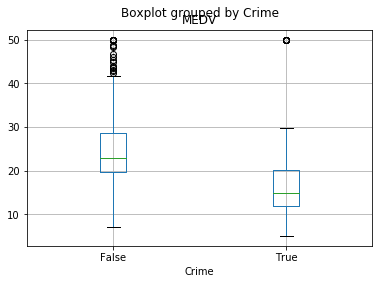

In [70]:
ds_boston.boxplot(column='MEDV', by='Crime')

[인사이트] 범죄율이 1.5 이하인 지역에서는 부동산 가격이 높게 나타난다.
= 범죄율이 낮으면 부동산 가격이 높게 나타난다.

In [71]:
ds_boston1 = ds_boston[ds_boston['CRIM'] > 1.5]["MEDV"]
ds_boston2 = ds_boston[ds_boston['CRIM'] <= 1.5]["MEDV"]

ds_boston1

34     13.500000
141    14.400000
142    13.400000
143    15.600000
144    11.800000
         ...    
483    21.799999
484    20.600000
485    21.200001
486    19.100000
487    20.600000
Name: MEDV, Length: 156, dtype: float64

In [72]:
t_result = stats.ttest_ind(ds_boston1,ds_boston2)
t,p = t_result.statistic.round(3), t_result.pvalue.round(3)
print("2-Sample t-test")
print(t_result)
print("t:{}".format(t))
print("p:{}".format(p))

2-Sample t-test
Ttest_indResult(statistic=-9.43106893665673, pvalue=1.4810615862977258e-19)
t:-9.431
p:0.0


#### [결론] p-value 는 0.05보다 작으므로 범죄율은 보스턴 부동산 가격에 영향을 미치는 것으로 판단할 수 있다.

### 3) 주거지 비율(ZN)과 부동산 가격

In [73]:
ds_boston['ZIP'] = (ds_boston['ZN'] >= 30)
ds_boston[50:]

,MEDV,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Black,Crime,ZIP
50,19.700001,0.08873,21.0,5.64,0,0.439,5.963,45.700001,6.8147,4,243,16.799999,395.559998,13.45,True,False,False
51,20.500000,0.04337,21.0,5.64,0,0.439,6.115,63.000000,6.8147,4,243,16.799999,393.970001,9.43,True,False,False
52,25.000000,0.05360,21.0,5.64,0,0.439,6.511,21.100000,6.8147,4,243,16.799999,396.899994,5.28,True,False,False
53,23.400000,0.04981,21.0,5.64,0,0.439,5.998,21.400000,6.8147,4,243,16.799999,396.899994,8.43,True,False,False
54,18.900000,0.01360,75.0,4.00,0,0.410,5.888,47.599998,7.3197,3,469,21.100000,396.899994,14.80,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,22.400000,0.06263,0.0,11.93,0,0.573,6.593,69.099998,2.4786,1,273,21.000000,391.989990,9.67,True,False,False
502,20.600000,0.04527,0.0,11.93,0,0.573,6.120,76.699997,2.2875,1,273,21.000000,396.899994,9.08,True,False,False
503,23.900000,0.06076,0.0,11.93,0,0.573,6.976,91.000000,2.1675,1,273,21.000000,396.899994,5.64,True,False,False
504,22.000000,0.10959,0.0,11.93,0,0.573,6.794,89.300003,2.3889,1,273,21.000000,393.450012,6.48,True,False,False


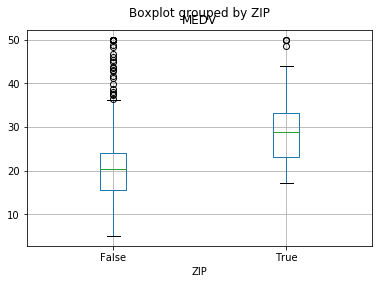

In [74]:
ds_boston.boxplot(column='MEDV', by='ZIP')

[인사이트] 주거지 비율이 30 이상인 지역에서는 부동산 가격이 높게 나타나지만, 주거지 비율이 30 이하인 지역에서도 의미있는 이상치(부동산 가격이 높게 나타나는 곳)가 많다.

In [76]:
ds_boston1 = ds_boston[ds_boston['ZN'] > 30]["MEDV"]
ds_boston2 = ds_boston[ds_boston['ZN'] <= 30]["MEDV"]

ds_boston1

39     30.799999
40     34.900002
54     18.900000
55     35.400002
56     24.700001
         ...    
351    24.100000
352    18.600000
353    30.100000
354    18.200001
355    20.600000
Name: MEDV, Length: 68, dtype: float64

In [77]:
t_result = stats.ttest_ind(ds_boston1,ds_boston2)
t,p = t_result.statistic.round(3), t_result.pvalue.round(3)
print("2-Sample t-test")
print(t_result)
print("t:{}".format(t))
print("p:{}".format(p))

2-Sample t-test
Ttest_indResult(statistic=7.138059308779175, pvalue=3.3196764798622252e-12)
t:7.138
p:0.0


#### [결론] p-value 는 0.05보다 작으므로 주거지 비율은 보스턴 부동산 가격에 영향을 미치는 것으로 판단할 수 있다.

### 4) 비소매업 비율(INDUS)과 부동산 가격

In [78]:
ds_boston['INDUSTRY'] = (ds_boston['INDUS'] >= 20)
ds_boston[50:]

,MEDV,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Black,Crime,ZIP,INDUSTRY
50,19.700001,0.08873,21.0,5.64,0,0.439,5.963,45.700001,6.8147,4,243,16.799999,395.559998,13.45,True,False,False,False
51,20.500000,0.04337,21.0,5.64,0,0.439,6.115,63.000000,6.8147,4,243,16.799999,393.970001,9.43,True,False,False,False
52,25.000000,0.05360,21.0,5.64,0,0.439,6.511,21.100000,6.8147,4,243,16.799999,396.899994,5.28,True,False,False,False
53,23.400000,0.04981,21.0,5.64,0,0.439,5.998,21.400000,6.8147,4,243,16.799999,396.899994,8.43,True,False,False,False
54,18.900000,0.01360,75.0,4.00,0,0.410,5.888,47.599998,7.3197,3,469,21.100000,396.899994,14.80,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,22.400000,0.06263,0.0,11.93,0,0.573,6.593,69.099998,2.4786,1,273,21.000000,391.989990,9.67,True,False,False,False
502,20.600000,0.04527,0.0,11.93,0,0.573,6.120,76.699997,2.2875,1,273,21.000000,396.899994,9.08,True,False,False,False
503,23.900000,0.06076,0.0,11.93,0,0.573,6.976,91.000000,2.1675,1,273,21.000000,396.899994,5.64,True,False,False,False
504,22.000000,0.10959,0.0,11.93,0,0.573,6.794,89.300003,2.3889,1,273,21.000000,393.450012,6.48,True,False,False,False


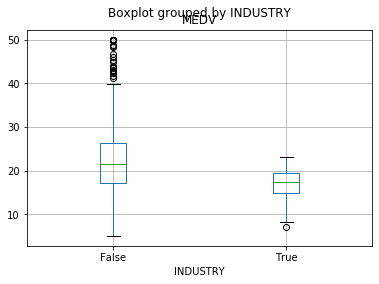

In [79]:
ds_boston.boxplot(column='MEDV', by='INDUSTRY')

[인사이트] 비소매업 비율이 20 이하인 지역에서는 부동산 가격이 높게 나타난다. = 비소매업 비율이 낮으면 부동산 가격이 높게 나타난다.

In [80]:
ds_boston1 = ds_boston[ds_boston['INDUS'] > 20]["MEDV"]
ds_boston2 = ds_boston[ds_boston['INDUS'] <= 20]["MEDV"]

ds_boston1

120    22.000000
121    20.299999
122    20.500000
123    17.299999
124    18.799999
125    21.400000
126    15.700000
127    16.200001
128    18.000000
129    14.300000
130    19.200001
131    19.600000
132    23.000000
133    18.400000
134    15.600000
135    18.100000
136    17.400000
137    17.100000
138    13.300000
139    17.799999
140    14.000000
141    14.400000
488    15.200000
489     7.000000
490     8.100000
491    13.600000
492    20.100000
Name: MEDV, dtype: float64

In [81]:
t_result = stats.ttest_ind(ds_boston1,ds_boston2)
t,p = t_result.statistic.round(3), t_result.pvalue.round(3)
print("2-Sample t-test")
print(t_result)
print("t:{}".format(t))
print("p:{}".format(p))

2-Sample t-test
Ttest_indResult(statistic=-3.300582652975437, pvalue=0.0010331951741702151)
t:-3.301
p:0.001


#### [결론] p-value 는 0.05보다 작으므로 비소매업 비율은 보스턴 부동산 가격에 영향을 미치는 것으로 판단할 수 있다.

### 5) 강 조망 여부(CHAS)와 부동산 가격

In [82]:
ds_boston['RIVER'] = (ds_boston['CHAS'] >= 1)
ds_boston[:]

,MEDV,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Black,Crime,ZIP,INDUSTRY,RIVER
0,24.000000,0.00632,18.0,2.31,0,0.538,6.575,65.199997,4.0900,1,296,15.300000,396.899994,4.98,True,False,False,False,False
1,21.600000,0.02731,0.0,7.07,0,0.469,6.421,78.900002,4.9671,2,242,17.799999,396.899994,9.14,True,False,False,False,False
2,34.700001,0.02729,0.0,7.07,0,0.469,7.185,61.099998,4.9671,2,242,17.799999,392.829987,4.03,True,False,False,False,False
3,33.400002,0.03237,0.0,2.18,0,0.458,6.998,45.799999,6.0622,3,222,18.700001,394.630005,2.94,True,False,False,False,False
4,36.200001,0.06905,0.0,2.18,0,0.458,7.147,54.200001,6.0622,3,222,18.700001,396.899994,5.33,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,22.400000,0.06263,0.0,11.93,0,0.573,6.593,69.099998,2.4786,1,273,21.000000,391.989990,9.67,True,False,False,False,False
502,20.600000,0.04527,0.0,11.93,0,0.573,6.120,76.699997,2.2875,1,273,21.000000,396.899994,9.08,True,False,False,False,False
503,23.900000,0.06076,0.0,11.93,0,0.573,6.976,91.000000,2.1675,1,273,21.000000,396.899994,5.64,True,False,False,False,False
504,22.000000,0.10959,0.0,11.93,0,0.573,6.794,89.300003,2.3889,1,273,21.000000,393.450012,6.48,True,False,False,False,False


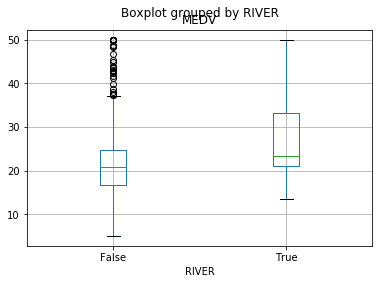

In [83]:
ds_boston.boxplot(column='MEDV', by='RIVER')

[인사이트] 상식적으로 대한민국의 한강과 같은 강 조망이 있는 집의 경우 부동산 가격이 비싸지만, 해당 데이터의 경우 CHAS 의 값이 0인 경우(부동산의 강 조망이 없는 경우)가 무수히 많기 때문에 보스턴 찰스 강의 조망을 가지고 있는 부동산의 수가 얼마 없다고 판단해 데이터가 불균형하다고 판단했다. 

In [84]:
ds_boston1 = ds_boston[ds_boston['CHAS'] >= 1]["MEDV"]
ds_boston2 = ds_boston[ds_boston['CHAS'] < 1]["MEDV"]

In [85]:
t_result = stats.ttest_ind(ds_boston1,ds_boston2)
t,p = t_result.statistic.round(3), t_result.pvalue.round(3)
print("2-Sample t-test")
print(t_result)
print("t:{}".format(t))
print("p:{}".format(p))

2-Sample t-test
Ttest_indResult(statistic=3.9964374793264246, pvalue=7.390622770250372e-05)
t:3.996
p:0.0


#### [결론] p-value 의 값이 0.05보다 작아 데이터 자체는 유의미하다고 할 수 있으나 전체 데이터 자체의 불균형 때문에 해당 변수는 분석 대상에서 제외한다.

### 6) 산화질소 농도(NOX)와 부동산 가격

In [86]:
ds_boston['AIR'] = (ds_boston['NOX'] < 0.7)
ds_boston[:]

,MEDV,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Black,Crime,ZIP,INDUSTRY,RIVER,AIR
0,24.000000,0.00632,18.0,2.31,0,0.538,6.575,65.199997,4.0900,1,296,15.300000,396.899994,4.98,True,False,False,False,False,True
1,21.600000,0.02731,0.0,7.07,0,0.469,6.421,78.900002,4.9671,2,242,17.799999,396.899994,9.14,True,False,False,False,False,True
2,34.700001,0.02729,0.0,7.07,0,0.469,7.185,61.099998,4.9671,2,242,17.799999,392.829987,4.03,True,False,False,False,False,True
3,33.400002,0.03237,0.0,2.18,0,0.458,6.998,45.799999,6.0622,3,222,18.700001,394.630005,2.94,True,False,False,False,False,True
4,36.200001,0.06905,0.0,2.18,0,0.458,7.147,54.200001,6.0622,3,222,18.700001,396.899994,5.33,True,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,22.400000,0.06263,0.0,11.93,0,0.573,6.593,69.099998,2.4786,1,273,21.000000,391.989990,9.67,True,False,False,False,False,True
502,20.600000,0.04527,0.0,11.93,0,0.573,6.120,76.699997,2.2875,1,273,21.000000,396.899994,9.08,True,False,False,False,False,True
503,23.900000,0.06076,0.0,11.93,0,0.573,6.976,91.000000,2.1675,1,273,21.000000,396.899994,5.64,True,False,False,False,False,True
504,22.000000,0.10959,0.0,11.93,0,0.573,6.794,89.300003,2.3889,1,273,21.000000,393.450012,6.48,True,False,False,False,False,True


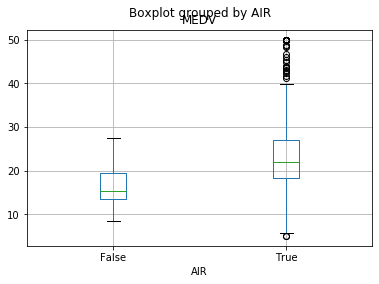

In [87]:
ds_boston.boxplot(column='MEDV', by='AIR')

[인사이트] 산화질소 농도가 0.7 이하인 지역에서는 부동산 가격이 높게 나타난다. = 산화질소 농도가 낮으면 부동산 가격이 높게 나타난다.

In [88]:
ds_boston1 = ds_boston[ds_boston['NOX'] < 0.7]["MEDV"]
ds_boston2 = ds_boston[ds_boston['NOX'] >= 0.7]["MEDV"]

In [89]:
t_result = stats.ttest_ind(ds_boston1,ds_boston2)
t,p = t_result.statistic.round(3), t_result.pvalue.round(3)
print("2-Sample t-test")
print(t_result)
print("t:{}".format(t))
print("p:{}".format(p))

2-Sample t-test
Ttest_indResult(statistic=5.984240266358395, pvalue=4.128902183746117e-09)
t:5.984
p:0.0


#### [결론] p-value 는 0.05보다 작으므로 산화질소 농도는 보스턴 부동산 가격에 영향을 미치는 것으로 판단할 수 있다.

### 7) 주거당 평균 객실 수(RM)와 부동산 가격

In [90]:
ds_boston['ROOM'] = (ds_boston['RM'] >= 5.5)
ds_boston[30:]

,MEDV,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,...,PTRATIO,B,LSTAT,Black,Crime,ZIP,INDUSTRY,RIVER,AIR,ROOM
30,12.7,1.13081,0.0,8.14,0,0.538,5.713,94.099998,4.2330,4,...,21.0,360.170013,22.600000,True,False,False,False,False,True,True
31,14.5,1.35472,0.0,8.14,0,0.538,6.072,100.000000,4.1750,4,...,21.0,376.730011,13.040000,True,False,False,False,False,True,True
32,13.2,1.38799,0.0,8.14,0,0.538,5.950,82.000000,3.9900,4,...,21.0,232.600006,27.709999,True,False,False,False,False,True,True
33,13.1,1.15172,0.0,8.14,0,0.538,5.701,95.000000,3.7872,4,...,21.0,358.769989,18.350000,True,False,False,False,False,True,True
34,13.5,1.61282,0.0,8.14,0,0.538,6.096,96.900002,3.7598,4,...,21.0,248.309998,20.340000,True,True,False,False,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,22.4,0.06263,0.0,11.93,0,0.573,6.593,69.099998,2.4786,1,...,21.0,391.989990,9.670000,True,False,False,False,False,True,True
502,20.6,0.04527,0.0,11.93,0,0.573,6.120,76.699997,2.2875,1,...,21.0,396.899994,9.080000,True,False,False,False,False,True,True
503,23.9,0.06076,0.0,11.93,0,0.573,6.976,91.000000,2.1675,1,...,21.0,396.899994,5.640000,True,False,False,False,False,True,True
504,22.0,0.10959,0.0,11.93,0,0.573,6.794,89.300003,2.3889,1,...,21.0,393.450012,6.480000,True,False,False,False,False,True,True


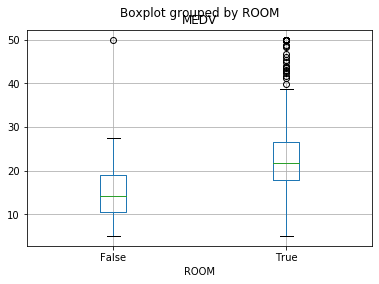

In [91]:
ds_boston.boxplot(column='MEDV', by='ROOM')

[인사이트] 주거당 평균 객실 수가 5.5개 이상인 지역에서는 부동산 가격이 높게 나타난다. = 주거당 평균 객실 수가 많으면 부동산 가격이 높게 나타난다.

In [92]:
ds_boston1 = ds_boston[ds_boston['RM'] < 5.5]["MEDV"]
ds_boston2 = ds_boston[ds_boston['RM'] >= 5.5]["MEDV"]

In [93]:
t_result = stats.ttest_ind(ds_boston1,ds_boston2)
t,p = t_result.statistic.round(3), t_result.pvalue.round(3)
print("2-Sample t-test")
print(t_result)
print("t:{}".format(t))
print("p:{}".format(p))

2-Sample t-test
Ttest_indResult(statistic=-5.558698550103613, pvalue=4.411928705917726e-08)
t:-5.559
p:0.0


#### [결론] p-value 는 0.05보다 작으므로 주거당 평균 객실 수는 보스턴 부동산 가격에 영향을 미치는 것으로 판단할 수 있다.

### 8) 노후 건물 비율(AGE)과 부동산 가격

In [94]:
ds_boston['OLD_AGE'] = (ds_boston['AGE'] >= 70)
ds_boston[:]

,MEDV,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,...,B,LSTAT,Black,Crime,ZIP,INDUSTRY,RIVER,AIR,ROOM,OLD_AGE
0,24.000000,0.00632,18.0,2.31,0,0.538,6.575,65.199997,4.0900,1,...,396.899994,4.98,True,False,False,False,False,True,True,False
1,21.600000,0.02731,0.0,7.07,0,0.469,6.421,78.900002,4.9671,2,...,396.899994,9.14,True,False,False,False,False,True,True,True
2,34.700001,0.02729,0.0,7.07,0,0.469,7.185,61.099998,4.9671,2,...,392.829987,4.03,True,False,False,False,False,True,True,False
3,33.400002,0.03237,0.0,2.18,0,0.458,6.998,45.799999,6.0622,3,...,394.630005,2.94,True,False,False,False,False,True,True,False
4,36.200001,0.06905,0.0,2.18,0,0.458,7.147,54.200001,6.0622,3,...,396.899994,5.33,True,False,False,False,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,22.400000,0.06263,0.0,11.93,0,0.573,6.593,69.099998,2.4786,1,...,391.989990,9.67,True,False,False,False,False,True,True,False
502,20.600000,0.04527,0.0,11.93,0,0.573,6.120,76.699997,2.2875,1,...,396.899994,9.08,True,False,False,False,False,True,True,True
503,23.900000,0.06076,0.0,11.93,0,0.573,6.976,91.000000,2.1675,1,...,396.899994,5.64,True,False,False,False,False,True,True,True
504,22.000000,0.10959,0.0,11.93,0,0.573,6.794,89.300003,2.3889,1,...,393.450012,6.48,True,False,False,False,False,True,True,True


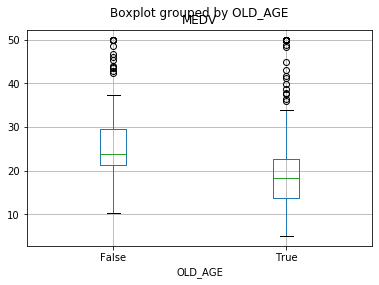

In [95]:
ds_boston.boxplot(column='MEDV', by='OLD_AGE')

[인사이트] 노후 건물 비율은 부동산 가격에 크게 영향을 주지 않는 것으로 나타났다.

In [96]:
ds_boston1 = ds_boston[ds_boston['AGE'] < 70]["MEDV"]
ds_boston2 = ds_boston[ds_boston['AGE'] >= 70]["MEDV"]

In [97]:
t_result = stats.ttest_ind(ds_boston1,ds_boston2)
t,p = t_result.statistic.round(3), t_result.pvalue.round(3)
print("2-Sample t-test")
print(t_result)
print("t:{}".format(t))
print("p:{}".format(p))

2-Sample t-test
Ttest_indResult(statistic=8.152076185729719, pvalue=2.8544086224785714e-15)
t:8.152
p:0.0


#### [결론] p-value 는 0.05보다 작으므로 변수 자체는 유의미하나 노후 건물 비율이 부동산 가격에 영향을 주지 않으므로 분석 대상에서 제외한다.

### 9) 중심지(노동센터) 접근거리(DIS)와 부동산 가격

In [98]:
ds_boston['CENTER'] = (ds_boston['DIS'] <= 6)
ds_boston[:]

,MEDV,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,...,LSTAT,Black,Crime,ZIP,INDUSTRY,RIVER,AIR,ROOM,OLD_AGE,CENTER
0,24.000000,0.00632,18.0,2.31,0,0.538,6.575,65.199997,4.0900,1,...,4.98,True,False,False,False,False,True,True,False,True
1,21.600000,0.02731,0.0,7.07,0,0.469,6.421,78.900002,4.9671,2,...,9.14,True,False,False,False,False,True,True,True,True
2,34.700001,0.02729,0.0,7.07,0,0.469,7.185,61.099998,4.9671,2,...,4.03,True,False,False,False,False,True,True,False,True
3,33.400002,0.03237,0.0,2.18,0,0.458,6.998,45.799999,6.0622,3,...,2.94,True,False,False,False,False,True,True,False,False
4,36.200001,0.06905,0.0,2.18,0,0.458,7.147,54.200001,6.0622,3,...,5.33,True,False,False,False,False,True,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,22.400000,0.06263,0.0,11.93,0,0.573,6.593,69.099998,2.4786,1,...,9.67,True,False,False,False,False,True,True,False,True
502,20.600000,0.04527,0.0,11.93,0,0.573,6.120,76.699997,2.2875,1,...,9.08,True,False,False,False,False,True,True,True,True
503,23.900000,0.06076,0.0,11.93,0,0.573,6.976,91.000000,2.1675,1,...,5.64,True,False,False,False,False,True,True,True,True
504,22.000000,0.10959,0.0,11.93,0,0.573,6.794,89.300003,2.3889,1,...,6.48,True,False,False,False,False,True,True,True,True


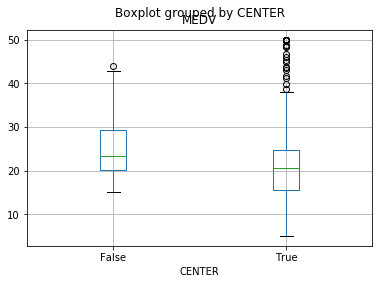

In [99]:
ds_boston.boxplot(column='MEDV', by='CENTER')

[인사이트] 중심지(노동센터)와의 거리 6 이하인 지역일수록 부동산 가격이 높아진다. = 중심지(노동센터)와의 거리가 가까울수록 부동산 가격이 높아진다.

In [100]:
ds_boston1 = ds_boston[ds_boston['DIS'] <= 6]["MEDV"]
ds_boston2 = ds_boston[ds_boston['DIS'] > 6]["MEDV"]
t_result = stats.ttest_ind(ds_boston1,ds_boston2)
t,p = t_result.statistic.round(3), t_result.pvalue.round(3)
print("2-Sample t-test")
print(t_result)
print("t:{}".format(t))
print("p:{}".format(p))

2-Sample t-test
Ttest_indResult(statistic=-2.612156515800825, pvalue=0.009265751636541862)
t:-2.612
p:0.009


#### [결론] p-value 는 0.05보다 작기 때문에 중심지와의 거리는 부동산 가격에 영향을 미친다고 할 수 있다.

### 10) 고속도로 접근 편의성 지수(RAD)와 부동산 가격

In [101]:
ds_boston['ROAD'] = (ds_boston['RAD'] >= 20)
ds_boston[:]

,MEDV,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,...,Black,Crime,ZIP,INDUSTRY,RIVER,AIR,ROOM,OLD_AGE,CENTER,ROAD
0,24.000000,0.00632,18.0,2.31,0,0.538,6.575,65.199997,4.0900,1,...,True,False,False,False,False,True,True,False,True,False
1,21.600000,0.02731,0.0,7.07,0,0.469,6.421,78.900002,4.9671,2,...,True,False,False,False,False,True,True,True,True,False
2,34.700001,0.02729,0.0,7.07,0,0.469,7.185,61.099998,4.9671,2,...,True,False,False,False,False,True,True,False,True,False
3,33.400002,0.03237,0.0,2.18,0,0.458,6.998,45.799999,6.0622,3,...,True,False,False,False,False,True,True,False,False,False
4,36.200001,0.06905,0.0,2.18,0,0.458,7.147,54.200001,6.0622,3,...,True,False,False,False,False,True,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,22.400000,0.06263,0.0,11.93,0,0.573,6.593,69.099998,2.4786,1,...,True,False,False,False,False,True,True,False,True,False
502,20.600000,0.04527,0.0,11.93,0,0.573,6.120,76.699997,2.2875,1,...,True,False,False,False,False,True,True,True,True,False
503,23.900000,0.06076,0.0,11.93,0,0.573,6.976,91.000000,2.1675,1,...,True,False,False,False,False,True,True,True,True,False
504,22.000000,0.10959,0.0,11.93,0,0.573,6.794,89.300003,2.3889,1,...,True,False,False,False,False,True,True,True,True,False


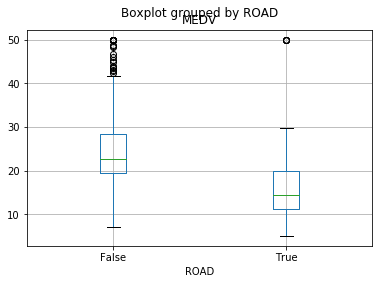

In [102]:
ds_boston.boxplot(column='MEDV', by='ROAD')

[인사이트] 상식적으로 접근했을 때 고속도로 접근 편의성 지수가 높으면 집값이 높을 것이라고 예상했으나, 실제로는 편의성 지수가 높지 않아도 집값이 높은 경우가 많았다. 따라서 고속도로 접근 편의성 지수는 부동산 가격에 큰 영향을 주지 않는다고 판단했다.

In [103]:
ds_boston1 = ds_boston[ds_boston['RAD'] <= 20]["MEDV"]
ds_boston2 = ds_boston[ds_boston['RAD'] > 20]["MEDV"]

t_result = stats.ttest_ind(ds_boston1,ds_boston2)
t,p = t_result.statistic.round(3), t_result.pvalue.round(3)
print("2-Sample t-test")
print(t_result)
print("t:{}".format(t))
print("p:{}".format(p))

2-Sample t-test
Ttest_indResult(statistic=9.690255282930414, pvalue=1.7778936162464715e-20)
t:9.69
p:0.0


#### [결론] p-value 는 0.05보다 작기 때문에 변수 자체는 유의미하나 고속도로 접근 편의성 지수가 부동산 가격에 영향을 주지 않으므로 분석 대상에서 제외한다.

### 11) 재산세율(TAX)과 부동산 가격

In [104]:
ds_boston['TAXX'] = (ds_boston['TAX'] >= 450)
ds_boston[30:]

,MEDV,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,...,Crime,ZIP,INDUSTRY,RIVER,AIR,ROOM,OLD_AGE,CENTER,ROAD,TAXX
30,12.7,1.13081,0.0,8.14,0,0.538,5.713,94.099998,4.2330,4,...,False,False,False,False,True,True,True,True,False,False
31,14.5,1.35472,0.0,8.14,0,0.538,6.072,100.000000,4.1750,4,...,False,False,False,False,True,True,True,True,False,False
32,13.2,1.38799,0.0,8.14,0,0.538,5.950,82.000000,3.9900,4,...,False,False,False,False,True,True,True,True,False,False
33,13.1,1.15172,0.0,8.14,0,0.538,5.701,95.000000,3.7872,4,...,False,False,False,False,True,True,True,True,False,False
34,13.5,1.61282,0.0,8.14,0,0.538,6.096,96.900002,3.7598,4,...,True,False,False,False,True,True,True,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,22.4,0.06263,0.0,11.93,0,0.573,6.593,69.099998,2.4786,1,...,False,False,False,False,True,True,False,True,False,False
502,20.6,0.04527,0.0,11.93,0,0.573,6.120,76.699997,2.2875,1,...,False,False,False,False,True,True,True,True,False,False
503,23.9,0.06076,0.0,11.93,0,0.573,6.976,91.000000,2.1675,1,...,False,False,False,False,True,True,True,True,False,False
504,22.0,0.10959,0.0,11.93,0,0.573,6.794,89.300003,2.3889,1,...,False,False,False,False,True,True,True,True,False,False


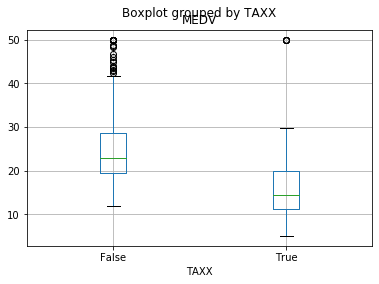

In [105]:
ds_boston.boxplot(column='MEDV', by='TAXX')

[인사이트] 상식적으로 접근했을 때 재산세율이 높을수록 부동산 가격이 높을 것이라고 판단했으나, 미국의 세금제도는 한국과 다른 시스템을 가지고 있어 재산세율이 높지 않아도 부동산 가격이 높은 경우가 많기 때문에 재산세율은 부동산 가격에 큰 영향을 주지 않는 것으로 판단했다.

In [106]:
ds_boston1 = ds_boston[ds_boston['TAX'] <= 450]["MEDV"]
ds_boston2 = ds_boston[ds_boston['TAX'] > 450]["MEDV"]

t_result = stats.ttest_ind(ds_boston1,ds_boston2)
t,p = t_result.statistic.round(3), t_result.pvalue.round(3)
print("2-Sample t-test")
print(t_result)
print("t:{}".format(t))
print("p:{}".format(p))

2-Sample t-test
Ttest_indResult(statistic=10.26971320051953, pvalue=1.3566289906265282e-22)
t:10.27
p:0.0


#### [결론] p-value 는 0.05보다 작기 때문에 변수 자체는 유의미하나 재산세율이 부동산 가격에 영향을 주지 않으므로 분석 대상에서 제외한다.

### 12) 학생 당 교사 비율(PTRATIO)과 부동산 가격

In [107]:
ds_boston['STU'] = (ds_boston['PTRATIO'] < 22)
ds_boston[:]

,MEDV,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,...,ZIP,INDUSTRY,RIVER,AIR,ROOM,OLD_AGE,CENTER,ROAD,TAXX,STU
0,24.000000,0.00632,18.0,2.31,0,0.538,6.575,65.199997,4.0900,1,...,False,False,False,True,True,False,True,False,False,True
1,21.600000,0.02731,0.0,7.07,0,0.469,6.421,78.900002,4.9671,2,...,False,False,False,True,True,True,True,False,False,True
2,34.700001,0.02729,0.0,7.07,0,0.469,7.185,61.099998,4.9671,2,...,False,False,False,True,True,False,True,False,False,True
3,33.400002,0.03237,0.0,2.18,0,0.458,6.998,45.799999,6.0622,3,...,False,False,False,True,True,False,False,False,False,True
4,36.200001,0.06905,0.0,2.18,0,0.458,7.147,54.200001,6.0622,3,...,False,False,False,True,True,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,22.400000,0.06263,0.0,11.93,0,0.573,6.593,69.099998,2.4786,1,...,False,False,False,True,True,False,True,False,False,True
502,20.600000,0.04527,0.0,11.93,0,0.573,6.120,76.699997,2.2875,1,...,False,False,False,True,True,True,True,False,False,True
503,23.900000,0.06076,0.0,11.93,0,0.573,6.976,91.000000,2.1675,1,...,False,False,False,True,True,True,True,False,False,True
504,22.000000,0.10959,0.0,11.93,0,0.573,6.794,89.300003,2.3889,1,...,False,False,False,True,True,True,True,False,False,True


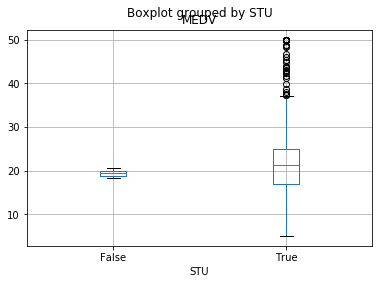

In [108]:
ds_boston.boxplot(column='MEDV', by='STU')

[인사이트] 학생 당 교사 비율이 높을수록 부동산 가격이 높을 것이라고 예상했으나, 예측과 달리 학생 당 교사 비율이 낮을수록 부동산 가격이 높았다.

In [109]:
ds_boston1 = ds_boston[ds_boston['PTRATIO'] < 22]["MEDV"]
ds_boston2 = ds_boston[ds_boston['PTRATIO'] >= 22]["MEDV"]

t_result = stats.ttest_ind(ds_boston1,ds_boston2)
t,p = t_result.statistic.round(3), t_result.pvalue.round(3)
print("2-Sample t-test")
print(t_result)
print("t:{}".format(t))
print("p:{}".format(p))

2-Sample t-test
Ttest_indResult(statistic=0.48231097018958347, pvalue=0.6297944484174908)
t:0.482
p:0.63


#### [결론] p-value 는 0.05보다 크기 때문에 변수 자체가 유의미하지 않다고 판단했고, 분석 대상에서 제외하기로 했다.

### 13) 저소득층(LSTAT) 비율과 부동산 가격

In [110]:
ds_boston['LESS'] = (ds_boston['LSTAT'] < 25)
ds_boston[:]

,MEDV,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,...,INDUSTRY,RIVER,AIR,ROOM,OLD_AGE,CENTER,ROAD,TAXX,STU,LESS
0,24.000000,0.00632,18.0,2.31,0,0.538,6.575,65.199997,4.0900,1,...,False,False,True,True,False,True,False,False,True,True
1,21.600000,0.02731,0.0,7.07,0,0.469,6.421,78.900002,4.9671,2,...,False,False,True,True,True,True,False,False,True,True
2,34.700001,0.02729,0.0,7.07,0,0.469,7.185,61.099998,4.9671,2,...,False,False,True,True,False,True,False,False,True,True
3,33.400002,0.03237,0.0,2.18,0,0.458,6.998,45.799999,6.0622,3,...,False,False,True,True,False,False,False,False,True,True
4,36.200001,0.06905,0.0,2.18,0,0.458,7.147,54.200001,6.0622,3,...,False,False,True,True,False,False,False,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,22.400000,0.06263,0.0,11.93,0,0.573,6.593,69.099998,2.4786,1,...,False,False,True,True,False,True,False,False,True,True
502,20.600000,0.04527,0.0,11.93,0,0.573,6.120,76.699997,2.2875,1,...,False,False,True,True,True,True,False,False,True,True
503,23.900000,0.06076,0.0,11.93,0,0.573,6.976,91.000000,2.1675,1,...,False,False,True,True,True,True,False,False,True,True
504,22.000000,0.10959,0.0,11.93,0,0.573,6.794,89.300003,2.3889,1,...,False,False,True,True,True,True,False,False,True,True


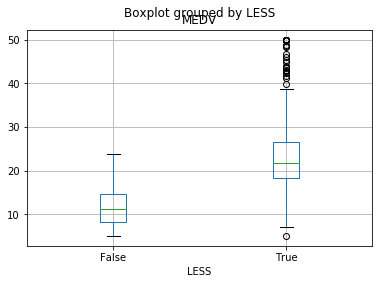

In [111]:
ds_boston.boxplot(column='MEDV', by='LESS')

[인사이트] 저소득층 비율이 25보다 낮을수록 부동산 가격이 높다. = 저소득층 비율이 낮을수록 부동산 가격이 높다.


In [112]:
ds_boston1 = ds_boston[ds_boston['LSTAT'] < 25]["MEDV"]
ds_boston2 = ds_boston[ds_boston['LSTAT'] >= 25]["MEDV"]

t_result = stats.ttest_ind(ds_boston1,ds_boston2)
t,p = t_result.statistic.round(3), t_result.pvalue.round(3)
print("2-Sample t-test")
print(t_result)
print("t:{}".format(t))
print("p:{}".format(p))

2-Sample t-test
Ttest_indResult(statistic=7.407618788241863, pvalue=5.451985039155302e-13)
t:7.408
p:0.0


#### [결론] p-value 는 0.05보다 작기 때문에 저소득층 비율은 부동산 가격에 영향을 미친다.

## (2) Scree plot 을 통해 변수 간 관계 파악

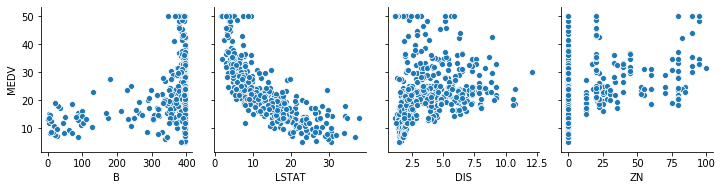

In [169]:
sns.pairplot(ds_boston, y_vars='MEDV', x_vars=['B', 'LSTAT', 'DIS', 'ZN'])

#### 흑인 인구 비율이 높을수록 주택 가격이 높다
#### 저소득층 비율이 높을수록 주택 가격이 낮다
#### 중심지와의 거리가 가까울수록 주택 가격의 편차가 크다
#### 주거지 비율이 나을수록 주택 가격의 편차가 크다 

# 4. 모델링(그래디언트 부스팅)

In [113]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

from matplotlib import font_manager, rc
from sklearn.tree import export_graphviz
import graphviz
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV

### 4-1) 데이터 구성하기

##### 포함되는 변수만 나오도록 나머지 결측치 처리 ---> 대상 변수에서 제외시키기.

In [114]:
# 보스턴 하우징 파일 불러오기
df_boston = pd.read_csv('./BOSTON_HOUSING.csv', engine = 'python')
df_boston.head()

,MEDV,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,24.000000,0.00632,18.0,2.31,0,0.538,6.575,65.199997,4.0900,1,296,15.300000,396.899994,4.98
1,21.600000,0.02731,0.0,7.07,0,0.469,6.421,78.900002,4.9671,2,242,17.799999,396.899994,9.14
2,34.700001,0.02729,0.0,7.07,0,0.469,7.185,61.099998,4.9671,2,242,17.799999,392.829987,4.03
3,33.400002,0.03237,0.0,2.18,0,0.458,6.998,45.799999,6.0622,3,222,18.700001,394.630005,2.94
4,36.200001,0.06905,0.0,2.18,0,0.458,7.147,54.200001,6.0622,3,222,18.700001,396.899994,5.33


In [115]:
# 목표변수 MEDV 지정
df_boston_y = df_boston['MEDV']
df_boston_x = df_boston.drop('MEDV', axis=1, inplace=False)

In [116]:
# 데이터 분할
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_boston_x, df_boston_y, test_size=0.3, random_state = 1234)
print('train data X size: {}'.format(df_train_x.shape))
print('train data Y size: {}'.format(df_train_y.shape))
print('test data X size: {}'.format(df_test_x.shape))
print('test data Y size: {}'.format(df_test_y.shape))

train data X size: (354, 13)
train data Y size: (354,)
test data X size: (152, 13)
test data Y size: (152,)


### 4-2) 모델 생성

In [117]:
# 기본 옵션으로 모델 생성하기
gb_uncustomized = GradientBoostingRegressor(random_state=1234)
gb_uncustomized.fit(df_train_x, df_train_y)
print('Score on training set: {:.3f}'.format(gb_uncustomized.score(df_train_x, df_train_y)))
print('Score on test set: {:.3f}'.format(gb_uncustomized.score(df_test_x, df_test_y)))

Score on training set: 0.981
Score on test set: 0.903


In [118]:
# 현재 생성된 트리 모델의 옵션 확인
gb_uncustomized

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=1234, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

### [n-estimators: 트리 수 변경에 따른 모델 성능]

In [119]:
# train 및 test 데이터 설명력 결과 저장
train_score = []
test_score = []

# n-estimators 트리 수 변경
para_n_tree = [n_tree*10 for n_tree in range(1,11)]

In [120]:
for v_n_estimators in para_n_tree:
    gb = GradientBoostingRegressor(random_state=1234, n_estimators = v_n_estimators)
    gb.fit(df_train_x, df_train_y)
    train_score.append(gb.score(df_train_x, df_train_y))
    test_score.append(gb.score(df_test_x, df_test_y))

# 결과 저장
df_score_n = pd.DataFrame()
df_score_n['Estimators'] = para_n_tree
df_score_n['TrainScore'] = train_score
df_score_n['TestScore'] = test_score

In [121]:
df_score_n.round(3)

,Estimators,TrainScore,TestScore
0,10,0.770,0.753
1,20,0.907,0.866
2,30,0.942,0.888
3,40,0.957,0.895
4,50,0.965,0.898
5,60,0.970,0.899
6,70,0.974,0.900
7,80,0.978,0.903
8,90,0.979,0.903
9,100,0.981,0.903


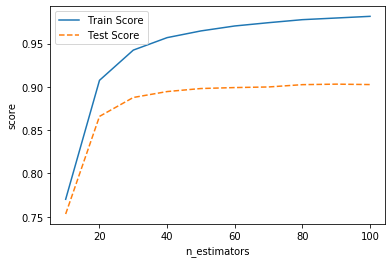

In [122]:
# 모델 설명력 그래프 확인
plt.plot(para_n_tree, train_score, linestyle='-', label='Train Score')
plt.plot(para_n_tree, test_score, linestyle='--', label='Test Score')
plt.ylabel('score')
plt.xlabel('n_estimators')
plt.legend()

트리 수 증가에 따라 모델의 설명력이 지속적으로 향상되고 있으므로 트리 수는 100개로 선정한다.

### [min_samples_leaf: 잎사귀 노드의 최소 자료 수 변경에 따른 모델 성능]

In [123]:
train_score = []
test_score = []
para_leaf = [n_leaf*1 for n_leaf in range(1,21)]

for v_min_samples_leaf in para_leaf:
    rf = GradientBoostingRegressor(random_state=1234, n_estimators = 30, min_samples_leaf=v_min_samples_leaf)
    rf.fit(df_train_x, df_train_y)
    train_score.append(rf.score(df_train_x, df_train_y))
    test_score.append(rf.score(df_test_x, df_test_y))

df_score_leaf = pd.DataFrame()
df_score_leaf['MinSamplesLeaf'] = para_leaf
df_score_leaf['TrainScore'] = train_score
df_score_leaf['TestScore'] = test_score

In [124]:
df_score_leaf.round(3)

,MinSamplesLeaf,TrainScore,TestScore
0,1,0.942,0.888
1,2,0.941,0.881
2,3,0.939,0.889
3,4,0.937,0.889
4,5,0.931,0.881
5,6,0.926,0.882
6,7,0.919,0.873
7,8,0.915,0.868
8,9,0.913,0.878
9,10,0.912,0.881


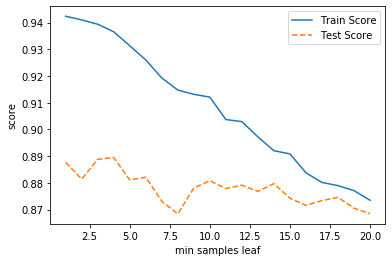

In [125]:
plt.plot(para_leaf, train_score, linestyle='-', label='Train Score')
plt.plot(para_leaf, test_score, linestyle='--', label='Test Score')
plt.ylabel('score')
plt.xlabel('min samples leaf')
plt.legend()

잎사귀 노드의 최소 자료 수 증가에 따라 모델의 설명력은 감소한다. Test 데이터의 성능 변화를 고려하여 잎사귀 노드의 최소 자료수는 4개로 했다.

### [min_samples_split: 분리 노드의 최소 자료 수 변경에 따른 모델 성능]

In [126]:
train_score = []
test_score = []
para_split = [n_split*2 for n_split in range(1,21)]

for v_min_samples_split in para_split:
    gb = GradientBoostingRegressor(random_state=1234, n_estimators = 30, min_samples_leaf = 11, min_samples_split=v_min_samples_split)
    gb.fit(df_train_x, df_train_y)
    train_score.append(gb.score(df_train_x, df_train_y))
    test_score.append(gb.score(df_test_x, df_test_y))

df_score_split = pd.DataFrame()
df_score_split['MinSamplesSplit'] = para_split
df_score_split['TrainScore'] = train_score
df_score_split['TestScore'] = test_score

In [127]:
df_score_split.round(3)

,MinSamplesSplit,TrainScore,TestScore
0,2,0.904,0.878
1,4,0.904,0.878
2,6,0.904,0.878
3,8,0.904,0.878
4,10,0.904,0.878
5,12,0.904,0.878
6,14,0.904,0.878
7,16,0.904,0.878
8,18,0.904,0.878
9,20,0.904,0.878


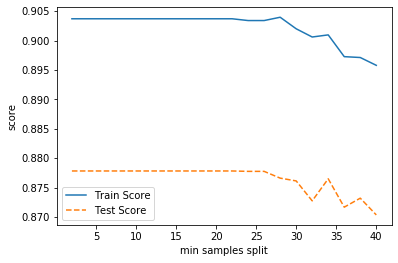

In [128]:
plt.plot(para_split, train_score, linestyle='-', label='Train Score')
plt.plot(para_split, test_score, linestyle='--', label='Test Score')
plt.ylabel('score')
plt.xlabel('min samples split')
plt.legend()

분리 노드 최소 자료 수가 25개일때까지는 설명력이 일정하다가, 그 이후로 급격히 감소한다. 따라서 Train, Test 데이터의 성능 변화를 고려하여 분리 노드 최소 자료 수는 20개로 한다.

### [max_depth: 최대 깊이 변경에 따른 모델 성능]

In [129]:
train_score = []
test_score = []
para_depth = [depth for depth in range(1, 11)]

for v_max_depth in para_depth:
    gb = GradientBoostingRegressor(random_state=1234, n_estimators = 30, min_samples_leaf = 11, min_samples_split = 22, max_depth = v_max_depth)
    gb.fit(df_train_x, df_train_y)
    train_score.append(gb.score(df_train_x, df_train_y))
    test_score.append(gb.score(df_test_x, df_test_y))

df_score_depth = pd.DataFrame()
df_score_depth['Depth'] = para_depth
df_score_depth['TrainScore'] = train_score
df_score_depth['TestScore'] = test_score

In [130]:
df_score_depth.round(3)

,Depth,TrainScore,TestScore
0,1,0.759,0.769
1,2,0.856,0.842
2,3,0.904,0.878
3,4,0.932,0.889
4,5,0.939,0.889
5,6,0.946,0.891
6,7,0.946,0.889
7,8,0.949,0.893
8,9,0.950,0.892
9,10,0.950,0.893


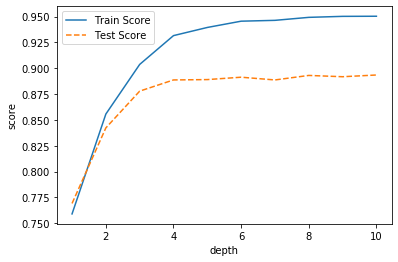

In [131]:
plt.plot(para_depth, train_score, linestyle='-', label='Train Score')
plt.plot(para_depth, test_score, linestyle='--', label='Test Score')
plt.ylabel('score')
plt.xlabel('depth')
plt.legend()

최대 깊이 증가에 따라 모델의 설명력은 증가한다. test 데이터의 성능 변화를 고려하여 최대 깊이는 4로 설정한다.

### [learning rate: 학습률 변경에 따른 모델 성능]

In [132]:
train_score = []
test_score = []

para_lr = [lr*0.1 for lr in range(1, 10)]

for v_learning_rate in para_lr:
    gb = GradientBoostingRegressor(random_state=1234, n_estimators = 30, min_samples_leaf = 11, min_samples_split = 22, max_depth = 4, learning_rate = v_learning_rate)
    gb.fit(df_train_x, df_train_y)
    train_score.append(gb.score(df_train_x, df_train_y))
    test_score.append(gb.score(df_test_x, df_test_y))

df_score_lr = pd.DataFrame()
df_score_lr['LearningRate'] = para_lr
df_score_lr['TrainScore'] = train_score
df_score_lr['TestScore'] = test_score

In [133]:
df_score_lr.round(3)

,LearningRate,TrainScore,TestScore
0,0.1,0.932,0.889
1,0.2,0.964,0.902
2,0.3,0.972,0.901
3,0.4,0.982,0.901
4,0.5,0.987,0.900
5,0.6,0.988,0.892
6,0.7,0.991,0.894
7,0.8,0.992,0.868
8,0.9,0.993,0.855


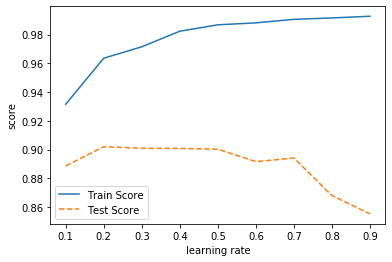

In [135]:
plt.plot(para_lr, train_score, linestyle='-', label='Train Score')
plt.plot(para_lr, test_score, linestyle='--', label='Test Score')
plt.ylabel('score')
plt.xlabel('learning rate')
plt.legend()

학습률이 증가함에 따라 모델의 설명력은 증가하는 반면 test 데이터의 성능은 학습률이 0.7보다 커지면 급격하게 감소한다. 안정적인 모델을 위해 학습률을 0.1로 설정한다.

# 5. 결론 도출

In [167]:
gb_final = GradientBoostingRegressor(random_state=1234, n_estimators=100, min_samples_leaf=4, min_samples_split=20, max_depth=4, learning_rate=0.1)
gb_final.fit(df_train_x, df_train_y)
print('Score on training set: {:.3f}'.format(gb_final.score(df_train_x, df_train_y)))
print('Score on test set: {:.3f}'.format(gb_final.score(df_test_x, df_test_y)))

Score on training set: 0.987
Score on test set: 0.907


In [152]:
v_feature_name = df_train_x.columns

In [153]:
df_importance = pd.DataFrame()
df_importance['Feature'] = v_feature_name
df_importance['Importance'] = gb_final.feature_importances_

In [154]:
df_importance.sort_values('Importance', ascending=False, inplace=True)
df_importance.round(3)

,Feature,Importance
12,LSTAT,0.535
5,RM,0.266
7,DIS,0.100
4,NOX,0.023
11,B,0.016
10,PTRATIO,0.015
0,CRIM,0.013
6,AGE,0.011
9,TAX,0.010
2,INDUS,0.007


Text(0, 0.5, 'Feature')

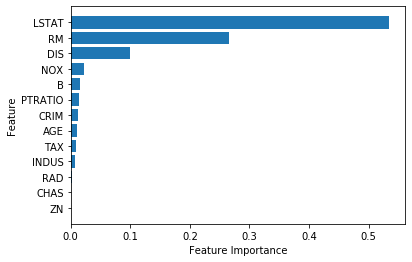

In [156]:
df_importance.sort_values('Importance', ascending=True, inplace=True)
coordinates = range(len(df_importance))
plt.barh(y=coordinates, width = df_importance['Importance'])
plt.yticks(coordinates, df_importance['Feature'])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')

LSTAT(저소득층 비율), RM(주거당 평균 객실 수), DIS(중심지 접근거리) 순으로 설명변수의 영향력이 크다고 할 수 있다. 단, 계산된 변수 중요도 값이 낮거나 0이더라도 선택되는 데이터에 따라 중요도가 변경될 수 있다.